In [1]:
import StreamStatistics
import random
import time
import numpy as np

from StreamStatistics import SimpleTDigest,MKTrendDetector

## Synthetic Pythonic stream ##

A gaussian distribution with mu,variance = (0, 2) will be used, we will check when the method converges with Epsilon = 0.01 difference. 

In [2]:
def gaussian_stream(mu=0.0, sigma=2.0, rate=1.0):
    """
    Generate an infinite stream of random numbers from a Gaussian (normal) distribution.

    Parameters
    ----------
    mu : float
        Mean of the Gaussian distribution.
    sigma : float
        Standard deviation of the Gaussian distribution.
    rate : float
        Number of samples per second (1.0 means 1 sample/sec).
    """
    interval = 1.0 / rate
    while True:
        value = random.gauss(mu, sigma)
        yield value
        time.sleep(interval)


In [3]:
gaussian_stream_generator = gaussian_stream();

mu = 0.0;

sigma = 2.0;

MovingSequential = StreamStatistics.MovingStatistics();

Epsilon = 0.01;


for i,sample in enumerate(gaussian_stream_generator):
    MovingSequential.UpdateAll(sample);
    
    print("Current Mean",MovingSequential.mean);

    if abs(mu - MovingSequential.mean) <= Epsilon:
        print(f"Mean converge!! at {i}");
        break;
    
    if abs(sigma**2 - (MovingSequential.variance)) <= Epsilon:
        print(f"Variance converge {i}!!");
        break;
    

    
    print("Current Variance",MovingSequential.variance);



Current Mean -1.2333017016713241
Current Variance 0
Current Mean -0.8826541552924162
Current Variance 0.24590740356309682
Current Mean 0.020176891383429485
Current Variance 2.568265398306958


KeyboardInterrupt: 

The mean has converged after 66 samples while the variance is still not close to the true one.

In [4]:
gaussian_stream_generator = gaussian_stream();

mu = 0.0;

sigma = 2.0;

MovingExponential = StreamStatistics.MovingStatistics(method="exponential");

Epsilon = 0.01;


for i,sample in enumerate(gaussian_stream_generator):


    MovingExponential.UpdateAll(sample);
    print("Current Mean",MovingExponential.mean);

    if abs(mu - MovingExponential.mean) <= Epsilon and abs(last_mean - MovingExponential.mean) <= Epsilon:
        print(f"Mean converge!! at {i}");
        break;
    
    print("Current Variance",MovingExponential.variance);
    
    if abs(sigma**2 - (MovingExponential.variance)) <= Epsilon and abs(last_variance - MovingExponential.variance) <= Epsilon:
        print(f"Variance converge {i}!!");
        break;
    
    last_mean = MovingExponential.mean;
    last_variance = MovingExponential.variance;

    



Current Mean -0.03581577932311007
Current Variance 0
Current Mean -0.04557040502311731
Current Variance 0.004634428197058078
Current Mean -0.1908203027426411
Current Variance 0.07627443955981789


KeyboardInterrupt: 

Mean converges at 176, and the variance is still far.


In [5]:
gaussian_stream_generator = gaussian_stream();
mu = 1.0;
sigma = 2.0;
WindowStatistic = StreamStatistics.WindowSequentialStatistics(window_size = 30);
Epsilon = 0.01;


for i,sample in enumerate(gaussian_stream_generator):

    WindowStatistic.UpdateAll(sample);
    print("Current Mean",WindowStatistic.mean);
    print("Current window", WindowStatistic.window)

    if abs(mu - WindowStatistic.mean) <= Epsilon and abs(last_mean - WindowStatistic.mean) <= Epsilon:
        print(f"Mean converge!! at {i}");
        break;
    
    print("Current Variance",WindowStatistic.variance);
    
    if abs(sigma**2 - (WindowStatistic.variance)) <= Epsilon and abs(last_variance - WindowStatistic.variance) <= Epsilon:
        print(f"Variance converge {i}!!");
        break;
    
    last_mean = WindowStatistic.mean;
    last_variance = WindowStatistic.variance;

    



N is still smaller than window size
Current Mean 0
Current window [0.37046167 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Current Variance 0
N is still smaller than window size
Current Mean 0
Current window [ 0.37046167 -2.79061565  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
Current Variance 0
N is still smaller than window size
Current Mean 0
Current window [ 0.37046167 -2.79061565  0.08579302  0.          0.          0.
  0.          0.          0.          0.          0.         

KeyboardInterrupt: 

It converges only for large window sizes

In [ ]:
gaussian_stream_generator = gaussian_stream();
mu = 1.0;
sigma = 2.0;
Digest = SimpleTDigest(delta=0.1);
Epsilon = 0.01;
data_list = []

for i,sample in enumerate(gaussian_stream_generator):

    Digest.update(sample)
    data_list.append(sample);
    print(len(Digest.centroids))
    print("predicted 75%",Digest.percentile(1))
    print("predicted 50%",Digest.percentile(2))
    print("predicted 25%",Digest.percentile(3))
    q25, q50, q75 = np.percentile(data_list, [1, 2, 3])
    print(f"25%: {q25}, 50%: {q50}, 75%: {q75}")


In [21]:
Digest = SimpleTDigest(delta=0.1);
TrendDetector = MKTrendDetector(Digest);

Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
Not enough samples for Trend detection
S value :  0 P-value :  1.0
No significant trend
S value :  -21.0 P-value :  0.5727823105937271
No significant trend
S value :  -44.0 P-value :  0.28615732110495795
No s

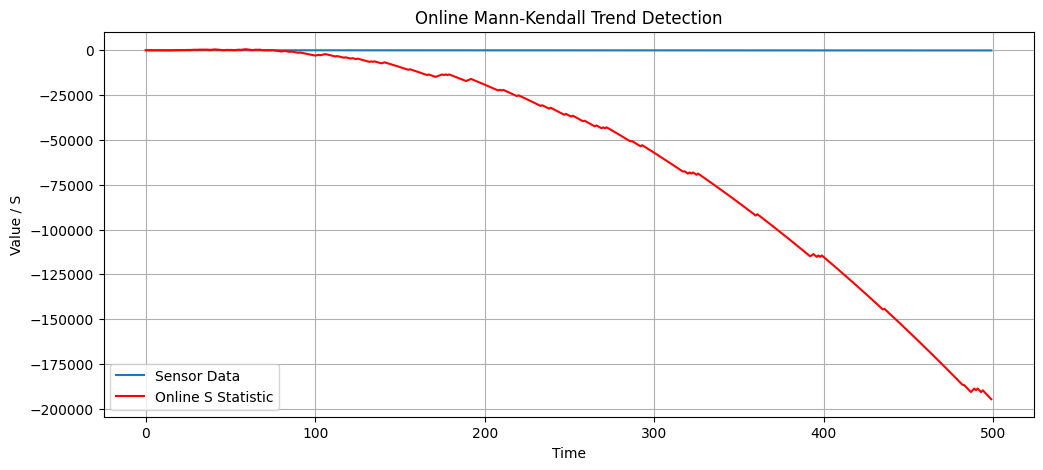

In [22]:

import matplotlib.pyplot as plt
n_points = 500          # number of points in the stream
start_value = 10        # initial value
slope = 0.2           # positive trend per step
noise_std = 1.0         # standard deviation of Gaussian noise

# Generate data
np.random.seed(42)  # for reproducibility

time = np.arange(n_points);

data = start_value - slope*time + np.random.normal(0, noise_std, n_points);


# --- Feed data as a stream ---

S_values = []
Z_values = []
trends = []

for x in data:
    TrendDetector.update(x)
    TrendDetector.compute_variance_Z()
    trend = TrendDetector.trend()
    print("S value : ", TrendDetector.S, "P-value : ", TrendDetector.P)
    S_values.append(TrendDetector.S)
    Z_values.append(TrendDetector.Z)
    print(trend)
    trends.append(trend)

# --- Plot S statistic over the stream ---
plt.figure(figsize=(12,5))
plt.plot(time, data, label="Sensor Data")
plt.plot(time, S_values, label="Online S Statistic", color="red")
plt.title("Online Mann-Kendall Trend Detection")
plt.xlabel("Time")
plt.ylabel("Value / S")
plt.legend()
plt.grid(True)
plt.show()